# How are in-demand skills trending for Data Analysts?

Methology

* Aggregate skill counts monthly
* Re-analyze based on percentage of total jobs
* Plot the monthly skill demand

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset

# Load the dataset
data = load_dataset("lukebarousse/data_jobs")

# Convert the train split to a pandas DataFrame
df = data["train"].to_pandas()

# Convert job_posted_date to datetime format
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

# Convert job_skills from string representation of list to actual list
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [6]:
df_DA_US=df[(df['job_title']=="Data Analyst") & (df['job_country']=="United States")].copy()

In [7]:
df_DA_US['months']=df_DA_US['job_posted_date'].dt.month

In [8]:
df_DA_explode=df_DA_US.explode('job_skills')

In [9]:
df_DA_pivot=df_DA_explode.pivot_table(index='months',columns='job_skills',aggfunc='size')

In [10]:
df_DA_pivot.loc['total']=df_DA_pivot.sum()
df_DA_pivot=df_DA_pivot[df_DA_pivot.loc['total'].sort_values(ascending=False).index]

In [11]:
month_count=df_DA_US.groupby('months').size()
df_DA_pivot.drop(labels='total',axis=0,inplace=True)
df_DA_US_percent =df_DA_pivot.iloc[:12].div(month_count/100, axis=0)

In [12]:
df_plot=df_DA_US_percent.iloc[:,0:5]

In [21]:
df_plot=df_plot.reset_index()
df_plot['month_name']=df_plot['months'].apply(lambda x:pd.to_datetime(x,format="%m").strftime("%b"))
df_plot.drop(labels='months',axis=1,inplace=True)
df_plot=df_plot.set_index('month_name')


Text(0.5, 0, '2023')

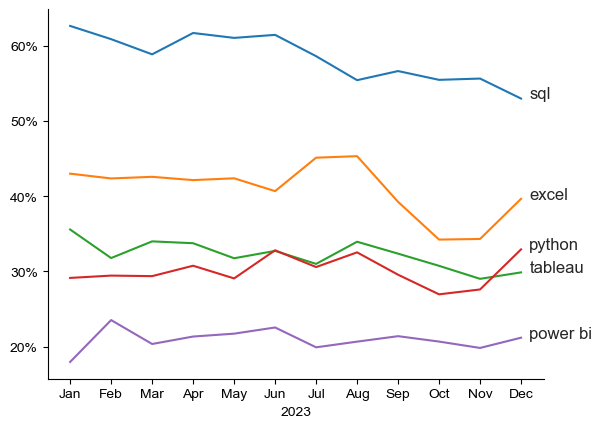

In [23]:
sns.lineplot(data=df_plot, dashes=False, legend=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()
from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))
from adjustText import adjust_text
for i in range(5):
    plt.text(11.2,df_plot.iloc[-1,i],df_plot.columns[i])
plt.xlabel('2023')